In [1]:
import numpy as np
from tqdm import tqdm

In [2]:
function = lambda x: -1 * np.exp(0.2 * np.sqrt(((x) - 1)**2 + ((x) + 1)**2) + np.cos(x) + np.sin(x))

In [3]:
function = np.vectorize(function)

In [4]:
popsize = 100; # size of the swarm
npar = 20; # number of dimensions
maxit = 10000; # number of iterations
c1 = 1; # cognitive parameter
c2 = 4-c1; # social parameter

In [5]:
par = np.random.rand(popsize,npar)
vel = np.random.rand(popsize,npar)

In [6]:
cost = function(par)

In [7]:
global_best = np.amin(par, axis=0)

In [8]:
localpar = par
localcost = cost
current_mean = par.mean()

In [9]:
states = []

This is a very watered down version of PSO that shown how each particle in the swarm moves to a collective goal of the group

In [12]:
for itr in tqdm(range(maxit)):
    w = (maxit - itr)/ maxit
    r1 = np.random.rand(popsize, npar)
    r2 = np.random.rand(popsize, npar)
    vel = C * (w*vel + c1 *r1*(localpar-par) + c2*r2*(np.ones((popsize,1))*global_best-par))
    par = par + vel
    overlimit = par <= 1
    underlimit = par >= 0
    par = par * overlimit + (overlimit ^ True);
    par = par * underlimit;
    cost = function(par)
    temp = np.amin(par, axis=0)
    if temp.sum() < global_best.sum():
        global_best = temp
    if par.sum() < localpar.sum():
        localpar = par;
    states.append(par.sum())
    

100%|██████████| 10000/10000 [01:47<00:00, 92.97it/s] 


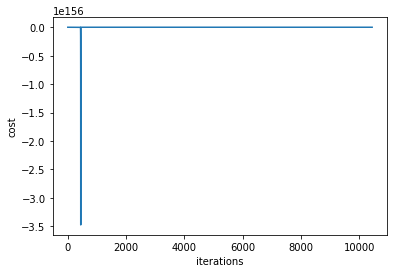

In [13]:
import matplotlib.pyplot as plt
plt.plot(states)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()